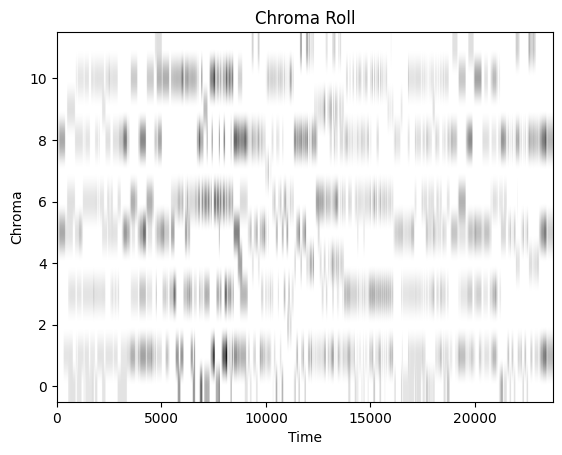

In [14]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt

def midi_to_piano_roll(midi_file, fs=100):
    # Load MIDI file
    midi_data = pretty_midi.PrettyMIDI(midi_file)
    # Get the piano roll (each row corresponds to a MIDI pitch, each column to a time step)
    piano_roll = midi_data.get_piano_roll(fs=fs)
    return piano_roll

def piano_roll_to_chroma_roll(piano_roll):
    # Initialize chroma roll matrix
    chroma_roll = np.zeros((12, piano_roll.shape[1]))
    # Sum energies for each chroma bin
    for i in range(128):
        chroma_bin = i % 12
        chroma_roll[chroma_bin, :] += piano_roll[i, :]
    return chroma_roll

# Example usage
midi_file = '/homes/kb658/fusion/input/debussy-clair-de-lune.mid'  # Replace with your MIDI file path
piano_roll = midi_to_piano_roll(midi_file)
original_chroma_roll = piano_roll_to_chroma_roll(piano_roll)

# Visualize the chroma roll
plt.imshow(original_chroma_roll, aspect='auto', origin='lower', cmap='gray_r')
plt.xlabel('Time')
plt.ylabel('Chroma')
plt.title('Chroma Roll')
plt.show()


In [15]:
original_chroma_roll.shape

(12, 23727)

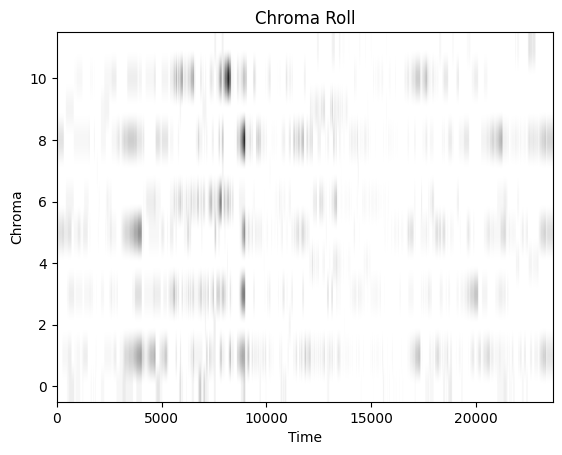

In [6]:
# Example usage
midi_file = '/homes/kb658/fusion/output/pass_3_generated_debussy-clair-de-lune.mid'  # Replace with your MIDI file path
generated_piano_roll = midi_to_piano_roll(midi_file)
generated_chroma_roll = piano_roll_to_chroma_roll(generated_piano_roll)

# Visualize the chroma roll
plt.imshow(generated_chroma_roll, aspect='auto', origin='lower', cmap='gray_r')
plt.xlabel('Time')
plt.ylabel('Chroma')
plt.title('Chroma Roll')
plt.show()


In [10]:
generated_chroma_roll.shape

(12, 23679)

In [17]:
import numpy as np
from copy import deepcopy
# Sample data: Each row is a data point, and each column is a feature
data = deepcopy(generated_chroma_roll.T)
# Step 2: Normalize the data (optional)
# Normalize each row to have a unit norm
norms = np.linalg.norm(data, axis=1, keepdims=True)
normalized_data = data / norms
# Step 3: Compute the self-similarity matrix using the dot product
self_similarity_matrix = np.dot(normalized_data, normalized_data.T)
print("Self-Similarity Matrix:")
print(self_similarity_matrix.shape)

/tmp/ipykernel_1119010/1251384470.py:13: RuntimeWarning: invalid value encountered in divide
  normalized_data = data / norms


Self-Similarity Matrix:
(23679, 23679)


In [ ]:
import numpy as np
from copy import deepcopy
# Sample data: Each row is a data point, and each column is a feature
data = deepcopy(original_chroma_roll.T)
# Step 2: Normalize the data (optional)
# Normalize each row to have a unit norm
norms = np.linalg.norm(data, axis=1, keepdims=True)
normalized_data = data / norms
# Step 3: Compute the self-similarity matrix using the dot product
self_similarity_matrix = np.dot(normalized_data, normalized_data.T)
print("Self-Similarity Matrix:")
print(self_similarity_matrix.shape)

a (100, 12)
b (70, 12)
np.dot(a, b.T)  == (100, 70)